In [1]:
import pandas as pd
import numpy as np
from utils.connect import GetQuery, GetPrices
from datetime import date
import matplotlib.pyplot as plt

import sqlite3
from scipy.stats import zscore
from scipy.stats import boxcox
from tqdm import tqdm
import json

import re

# Create database with returns and volatility

In [2]:
con = sqlite3.connect("./data.db")
c = con.cursor()

create_table = """
CREATE TABLE IF NOT EXISTS ticker_return_vol(
    symbol text,
    date text NOT NULL,
    ret real,
    vol_90 real
);

"""

c.execute(create_table)

In [3]:
def CalcData(ticker):
    prices = GetPrices(ticker, "2021-12-31", str(date.today()))
    prices = prices.reset_index()
    prices.columns = ['date', 'price']
    prices['ret'] = prices.price.pct_change()
    prices['symbol'] = ticker

    # remove first observation
    prices = prices.iloc[1::]
        


    # Calculate last 90 days volatility
    prices['vol_90'] = prices.ret.rolling(90).std() * np.sqrt(252) * 100
    prices['ret'] = prices.ret * 100
    out=prices[['symbol', 'date', 'ret', 'vol_90']]


    return out


In [4]:
tickers = GetQuery("""
        SELECT DISTINCT(symbol) FROM ticker_industries
    """)
tickers = list(tickers.symbol)

In [5]:
tickers[0:5]

['SRDX', 'CLF', 'HUGE', 'TRNO', 'POLA']

In [6]:
# Check in case the connection drops
existing_tickers = c.execute("""SELECT DISTINCT(symbol) FROM ticker_return_vol""").fetchall()
existing_tickers = [x[0] for x in existing_tickers]

tickers = list(set(tickers) - set(existing_tickers))
tickers[0:5]

['REPH', 'EVOL', 'SAFM', 'ATRS', 'TREC']

In [7]:
len(tickers)

64

In [8]:
for ticker in tqdm(tickers):
    try:
        tmp_ = CalcData(ticker)
        tmp_['date'] = tmp_.date.dt.date
        tmp_.to_sql(con=con, name="ticker_return_vol", if_exists='append', index=False)
    except:
        print(f"Something is wrong with {ticker}")
        continue


  2%|▋                                           | 1/64 [00:00<00:22,  2.81it/s]

Something is wrong with REPH


  3%|█▍                                          | 2/64 [00:00<00:24,  2.50it/s]

Something is wrong with EVOL


  5%|██                                          | 3/64 [00:01<00:25,  2.35it/s]

Something is wrong with SAFM


  6%|██▊                                         | 4/64 [00:01<00:24,  2.49it/s]

Something is wrong with ATRS


  8%|███▍                                        | 5/64 [00:01<00:22,  2.61it/s]

Something is wrong with TREC


  9%|████▏                                       | 6/64 [00:02<00:23,  2.42it/s]

Something is wrong with SWM


 11%|████▊                                       | 7/64 [00:02<00:24,  2.34it/s]

Something is wrong with HTA


 12%|█████▌                                      | 8/64 [00:03<00:24,  2.31it/s]

Something is wrong with CELP


 14%|██████▏                                     | 9/64 [00:03<00:22,  2.45it/s]

Something is wrong with SUMR


 16%|██████▋                                    | 10/64 [00:04<00:20,  2.61it/s]

Something is wrong with PLAN


 17%|███████▍                                   | 11/64 [00:04<00:21,  2.41it/s]

Something is wrong with NTUS


 19%|████████                                   | 12/64 [00:04<00:21,  2.47it/s]

Something is wrong with MIME


 20%|████████▋                                  | 13/64 [00:05<00:20,  2.46it/s]

Something is wrong with TVTY


 22%|█████████▍                                 | 14/64 [00:05<00:20,  2.48it/s]

Something is wrong with BLL


 23%|██████████                                 | 15/64 [00:06<00:18,  2.64it/s]

Something is wrong with HTBX


 25%|██████████▊                                | 16/64 [00:06<00:19,  2.51it/s]

Something is wrong with CCMP


 27%|███████████▍                               | 17/64 [00:06<00:18,  2.51it/s]

Something is wrong with PCOM


 28%|████████████                               | 18/64 [00:07<00:17,  2.70it/s]

Something is wrong with PROG


 30%|████████████▊                              | 19/64 [00:07<00:17,  2.55it/s]

Something is wrong with CTK


 31%|█████████████▍                             | 20/64 [00:07<00:17,  2.57it/s]

Something is wrong with GWGH


 33%|██████████████                             | 21/64 [00:08<00:15,  2.81it/s]

Something is wrong with VG


 34%|██████████████▊                            | 22/64 [00:08<00:15,  2.66it/s]

Something is wrong with NP


 36%|███████████████▍                           | 23/64 [00:09<00:15,  2.69it/s]

Something is wrong with ANTM


 38%|████████████████▏                          | 24/64 [00:09<00:13,  2.90it/s]

Something is wrong with MGP


 39%|████████████████▊                          | 25/64 [00:10<00:18,  2.15it/s]

Something is wrong with SREV


 41%|█████████████████▍                         | 26/64 [00:10<00:15,  2.40it/s]

Something is wrong with SGMS


 42%|██████████████████▏                        | 27/64 [00:10<00:15,  2.36it/s]

Something is wrong with DIDI


 44%|██████████████████▊                        | 28/64 [00:11<00:20,  1.80it/s]

Something is wrong with SGLB


 45%|███████████████████▍                       | 29/64 [00:12<00:17,  2.02it/s]

Something is wrong with NCBS


 47%|████████████████████▏                      | 30/64 [00:12<00:15,  2.22it/s]

Something is wrong with REGI


 48%|████████████████████▊                      | 31/64 [00:12<00:14,  2.21it/s]

Something is wrong with NSEC


 50%|█████████████████████▌                     | 32/64 [00:13<00:13,  2.39it/s]

Something is wrong with FLDM


 52%|██████████████████████▏                    | 33/64 [00:13<00:12,  2.57it/s]

Something is wrong with CDK


 53%|██████████████████████▊                    | 34/64 [00:13<00:11,  2.51it/s]

Something is wrong with OCDX


 55%|███████████████████████▌                   | 35/64 [00:14<00:11,  2.54it/s]

Something is wrong with CFX


 56%|████████████████████████▏                  | 36/64 [00:14<00:11,  2.42it/s]

Something is wrong with MSP


 58%|████████████████████████▊                  | 37/64 [00:15<00:10,  2.50it/s]

Something is wrong with PSTH


 59%|█████████████████████████▌                 | 38/64 [00:15<00:09,  2.66it/s]

Something is wrong with SRRA


 61%|██████████████████████████▏                | 39/64 [00:15<00:10,  2.46it/s]

Something is wrong with ONE


 62%|██████████████████████████▉                | 40/64 [00:16<00:09,  2.51it/s]

Something is wrong with VWTR


 64%|███████████████████████████▌               | 41/64 [00:16<00:08,  2.78it/s]

Something is wrong with CERN


 66%|████████████████████████████▏              | 42/64 [00:16<00:08,  2.68it/s]

Something is wrong with GTYH


 67%|████████████████████████████▉              | 43/64 [00:17<00:07,  2.67it/s]

Something is wrong with ZSAN


 69%|█████████████████████████████▌             | 44/64 [00:17<00:07,  2.85it/s]

Something is wrong with ENIA


 70%|██████████████████████████████▏            | 45/64 [00:18<00:07,  2.57it/s]

Something is wrong with IO


 72%|██████████████████████████████▉            | 46/64 [00:18<00:07,  2.54it/s]

Something is wrong with ANAT


 73%|███████████████████████████████▌           | 47/64 [00:19<00:07,  2.31it/s]

Something is wrong with AFI


 75%|████████████████████████████████▎          | 48/64 [00:19<00:06,  2.43it/s]

Something is wrong with JW-A


 77%|████████████████████████████████▉          | 49/64 [00:19<00:05,  2.63it/s]

Something is wrong with ETTX


 78%|█████████████████████████████████▌         | 50/64 [00:20<00:05,  2.41it/s]

Something is wrong with ZNGA


 80%|██████████████████████████████████▎        | 51/64 [00:20<00:05,  2.48it/s]

Something is wrong with TSC


 81%|██████████████████████████████████▉        | 52/64 [00:21<00:04,  2.44it/s]

Something is wrong with LUB


 83%|███████████████████████████████████▌       | 53/64 [00:21<00:04,  2.69it/s]

Something is wrong with FB


 84%|████████████████████████████████████▎      | 54/64 [00:21<00:03,  2.69it/s]

Something is wrong with IIN


 86%|████████████████████████████████████▉      | 55/64 [00:22<00:03,  2.52it/s]

Something is wrong with PBIP


 88%|█████████████████████████████████████▋     | 56/64 [00:22<00:03,  2.59it/s]

Something is wrong with MBT


 89%|██████████████████████████████████████▎    | 57/64 [00:22<00:02,  2.75it/s]

Something is wrong with NEW


 91%|██████████████████████████████████████▉    | 58/64 [00:23<00:02,  2.58it/s]

Something is wrong with SFUN


 92%|███████████████████████████████████████▋   | 59/64 [00:23<00:01,  2.62it/s]

Something is wrong with JP


 94%|████████████████████████████████████████▎  | 60/64 [00:23<00:01,  2.70it/s]

Something is wrong with IRCP


 95%|████████████████████████████████████████▉  | 61/64 [00:24<00:01,  2.28it/s]

Something is wrong with WEI


 97%|█████████████████████████████████████████▋ | 62/64 [00:24<00:00,  2.50it/s]

Something is wrong with APTS


 98%|██████████████████████████████████████████▎| 63/64 [00:25<00:00,  2.23it/s]

Something is wrong with LINX


100%|███████████████████████████████████████████| 64/64 [00:25<00:00,  2.48it/s]

Something is wrong with REDU


## Calculate risk score

In [9]:
# Get the list of tradable tickers
with open("./tradable_tickers.txt", 'rb') as f:
    dw = json.load(f)

In [10]:
tradable = [x['symbol'] for x in dw]

In [11]:
con = sqlite3.connect("./data.db")

In [12]:
c = con.cursor()

In [13]:
# Get all volatilities for the last date
vol = c.execute("""SELECT symbol, vol_90 FROM ticker_return_vol 
WHERE date=(SELECT MAX(date) FROM ticker_return_vol)
""").fetchall()
vol = pd.DataFrame(vol).dropna()
vol.columns = ['symbol', 'volatility']

In [14]:
vol

,symbol,volatility
0,COGT,62.810362
1,RMCF,31.829394
2,INSP,44.848684
3,NAOV,84.006264
4,BGSF,30.243856
...,...,...
4223,MEOH,51.782242
4224,FVRR,73.233036
4225,CHRA,86.371253
4226,RLI,26.815417


In [15]:
# Keep only tradable
gainy_tickers = list(vol.symbol)
gainy_tickers = [re.sub("-",".", x) for x in gainy_tickers]

gainy_tickers = [x  for x in gainy_tickers if x in tradable]

In [16]:
# Check missing tickers
missing = set(vol.symbol) - set(tradable)
missing

{'AACG',
 'AAMC',
 'AAME',
 'AAU',
 'AAVE.CC',
 'ABIO',
 'ACER',
 'ACHV',
 'ACMR',
 'ACR',
 'ACST',
 'ACU',
 'ADIL',
 'ADMP',
 'ADVM',
 'AE',
 'AEMD',
 'AESE',
 'AEY',
 'AEYE',
 'AEZS',
 'AFBI',
 'AGE',
 'AGFS',
 'AGRX',
 'AGTC',
 'AHPI',
 'AIH',
 'AIHS',
 'AIM',
 'AINC',
 'AIRG',
 'AIRI',
 'AIRT',
 'AKTX',
 'ALIM',
 'ALJJ',
 'ALLG',
 'ALNA',
 'ALOT',
 'ALRN',
 'ALTR',
 'AMBO',
 'AMPE',
 'AMS',
 'ANY',
 'AP',
 'APDN',
 'APM',
 'APT',
 'APTO',
 'APTX',
 'APVO',
 'APWC',
 'AQST',
 'ARAV',
 'ARBK',
 'ARC',
 'ARDS',
 'ARKR',
 'ARL',
 'ARTW',
 'ASLN',
 'ASM',
 'ASMB',
 'ASPU',
 'ASRV',
 'ASTC',
 'ASTI',
 'ASYS',
 'ATLO',
 'ATNM',
 'ATOS',
 'ATRA',
 'ATXI',
 'AUBN',
 'AUMN',
 'AUVI',
 'AVAX.CC',
 'AVGR',
 'AWH',
 'AWRE',
 'AWX',
 'AXAS',
 'AXR',
 'AYTU',
 'B',
 'BANX',
 'BAT.CC',
 'BATL',
 'BBGI',
 'BBIG',
 'BBQ',
 'BCDA',
 'BCH.CC',
 'BCLI',
 'BCOW',
 'BDL',
 'BELFB',
 'BF-A',
 'BF-B',
 'BFIN',
 'BGI',
 'BGSF',
 'BHAT',
 'BHVN',
 'BIOC',
 'BIOL',
 'BIPH',
 'BKCC',
 'BKSC',
 'BKTI',
 'BKYI',

In [17]:
# Check missing but included in TTFs
ttf_tickers = GetQuery(f"""
SELECT DISTINCT(symbol) FROM ticker_collections WHERE _sdc_extracted_at::date>'2022-09-01'
""")
ttf_tickers = [re.sub("-",".", x) for x in ttf_tickers.symbol]
ttf_tickers

['CLF',
 'TRNO',
 'RGA',
 'MKFG',
 'UE',
 'LAD',
 'PFE',
 'SUM',
 'VRSN',
 'KTOS',
 'NUE',
 'JBLU',
 'BMI',
 'AMH',
 'AN',
 'SSD',
 'WSR',
 'GDS',
 'VLD',
 'MMC',
 'D',
 'ARVL',
 'ARLP',
 'PG',
 'ALL',
 'SPG',
 'LKQ',
 'UMH',
 'ELS',
 'IAC',
 'GDDY',
 'BCS',
 'EVRG',
 'WFC',
 'NTST',
 'ROK',
 'SSYS',
 'ALEX',
 'FSLR',
 'TTWO',
 'VST',
 'THO',
 'FWONA',
 'FLO',
 'IDA',
 'PAG',
 'VMW',
 'PGRE',
 'FIGS',
 'HUBG',
 'VRE',
 'ESLT',
 'TDG',
 'LEN',
 'REG',
 'VSTO',
 'ANET',
 'EIX',
 'SNDR',
 'CHKP',
 'GLDD',
 'MU',
 'JELD',
 'BEEM',
 'CB',
 'LEN.B',
 'WING',
 'NVAX',
 'OXY',
 'ETR',
 'MRNA',
 'TWNK',
 'EOG',
 'CP',
 'JCI',
 'JBHT',
 'EXPE',
 'HSC',
 'TSLA',
 'SWBI',
 'AFRM',
 'MOS',
 'FFIV',
 'SNOW',
 'EL',
 'PGR',
 'POWW',
 'AMT',
 'BNL',
 'DOMO',
 'FRT',
 'BNTX',
 'BVN',
 'HNRG',
 'SKY',
 'DT',
 'COF',
 'ZBRA',
 'MRO',
 'ESS',
 'SJM',
 'AVB',
 'TRIP',
 'TEF',
 'PZZA',
 'HEI',
 'OFC',
 'COUR',
 'KGC',
 'ULCC',
 'VFC',
 'SWIM',
 'EXPD',
 'TD',
 'LUMN',
 'SWI',
 'BAC',
 'ENPH',
 'TOL',
 'DKNG

In [18]:
# We will add it for now back. 
'''
!!!!!! NEED TO CHECK WITH DRIVEWEALTH
'''

add_tickers = list(set(ttf_tickers) - set(tradable))
add_tickers

['EAT',
 'ARBK',
 'WRE',
 'SRS',
 'RIVN',
 'HNRG',
 'ALLG',
 'USAK',
 'S',
 'YELL',
 'FTEK',
 'WULF']

In [19]:
vol = vol.loc[vol.symbol.isin(tradable+add_tickers)]
vol.shape

(3296, 2)

# Create a risk score

In [20]:
# Get betas from our DB
betas = GetQuery(f"""
SELECT symbol,  beta 
FROM ticker_metrics 
WHERE symbol in {tuple(vol.symbol)}
""")

In [21]:
df = vol.merge(betas, on='symbol')
df

,symbol,volatility,beta
0,COGT,62.810362,-0.6596
1,INSP,44.848684,1.5117
2,EVLO,84.637072,1.3970
3,VREX,35.919204,0.8179
4,NGVC,37.845423,1.0533
...,...,...,...
3291,NARI,50.286417,1.2118
3292,MEOH,51.782242,2.0543
3293,FVRR,73.233036,1.6694
3294,RLI,26.815417,0.4519


In [22]:
# Assign percentiles
df['vol_pct'] = round(df.volatility.rank(pct=True),2)
df['beta_pct'] = round(df.beta.rank(pct=True),2)
df['risk_score'] = 0.75*df.vol_pct+0.25*(df.beta_pct)
df

,symbol,volatility,beta,vol_pct,beta_pct,risk_score
0,COGT,62.810362,-0.6596,0.76,0.00,0.5700
1,INSP,44.848684,1.5117,0.53,0.75,0.5850
2,EVLO,84.637072,1.3970,0.90,0.69,0.8475
3,VREX,35.919204,0.8179,0.36,0.26,0.3350
4,NGVC,37.845423,1.0533,0.40,0.43,0.4075
...,...,...,...,...,...,...
3291,NARI,50.286417,1.2118,0.61,0.56,0.5975
3292,MEOH,51.782242,2.0543,0.63,0.92,0.7025
3293,FVRR,73.233036,1.6694,0.85,0.81,0.8400
3294,RLI,26.815417,0.4519,0.12,0.08,0.1100


<AxesSubplot:>

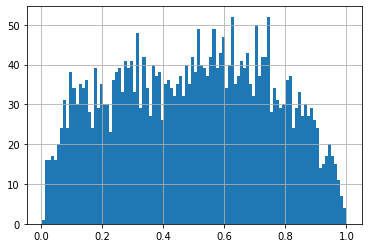

In [23]:
# Check distribution
df.risk_score.hist(bins=100)

In [24]:
def RiskScore(user_risk, stock_risk):
    if user_risk==2:
        raw_score = 1- ((stock_risk-0.75)**2)**(0.5)

    if user_risk==1:
        raw_score = 1- (((stock_risk-0.5)**2)**(0.5))*1.5

    
    if user_risk==0:
        raw_score = 1- ((stock_risk-0.25)**2)**(0.5)
  
   
    return raw_score 
        

## Example of Risk score for various clients

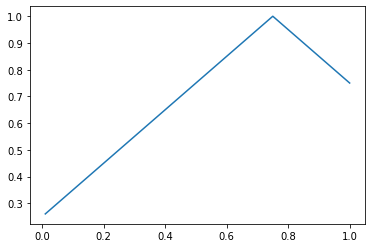

In [25]:
x = np.linspace(0.01,1.0,100)


y = [RiskScore(2,xi) for xi in x]

plt.plot(x,y)

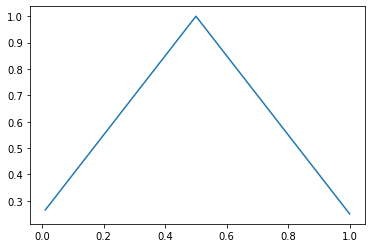

In [26]:
x = np.linspace(0.01,1.0,100)


y = [RiskScore(1,xi) for xi in x]

plt.plot(x,y)

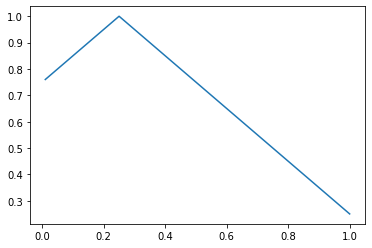

In [27]:
x = np.linspace(0.01,1.0,100)


y = [RiskScore(0,xi) for xi in x]

plt.plot(x,y)

## Boris' example with oil

In [28]:
# Boris Oil TTF Example
ttf_id = 92
stocks = GetQuery(f"""
SELECT symbol, weight FROM collection_ticker_weights WHERE collection_id={ttf_id} AND
date = (SELECT MAX(date) FROM collection_ticker_weights WHERE collection_id={ttf_id})
""")
stock_match = GetQuery(f"""
SELECT * FROM profile_ticker_match_score WHERE profile_id=6 AND symbol IN {tuple(stocks.symbol)}
""")

stock_match


,category_matches,fits_categories,fits_interests,fits_risk,interest_matches,match_score,profile_id,risk_similarity,symbol,updated_at,_sdc_batched_at,_sdc_deleted_at,_sdc_extracted_at,category_similarity,interest_similarity,matches_portfolio
0,"[6, 9]",1,2,0,[27],50,6,0.054316,BP,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.189519,None,2022-11-07 06:19:15.274227,0.623223,1.0,True
1,"[6, 9]",2,2,0,[27],50,6,0.256942,CLR,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.217055,None,2022-11-07 06:19:15.274227,0.852050,1.0,True
2,"[7, 6]",2,2,0,[27],50,6,0.068263,COP,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.224479,None,2022-11-07 06:19:15.274227,0.954513,1.0,True
3,"[6, 7]",2,2,0,[27],50,6,0.061029,CTRA,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.232722,None,2022-11-07 06:19:15.274227,0.889854,1.0,True
4,"[7, 6]",2,2,0,[27],50,6,0.035435,CVX,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.235377,None,2022-11-07 06:19:15.274227,0.913232,1.0,True
5,"[7, 6]",2,2,0,[27],50,6,0.260360,DVN,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.257640,None,2022-11-07 06:19:15.274227,0.862999,1.0,True
6,[6],1,2,0,[27],50,6,0.032614,E,2022-11-06 07:00:02.448708,2022-11-07 07:48:02.260402,None,2022-11-07 06:19:15.274227,0.587637,1.0,True
7,"[7, 9]",2,2,0,[27],50,6,0.103382,EOG,2022-11-06 07:00:02.448708,2022-11-07 07:48:03.106603,None,2022-11-07 06:19:15.274227,0.859955,1.0,True
8,"[6, 7]",2,2,0,[27],50,6,0.297542,FANG,2022-11-06 07:00:02.448708,2022-11-07 07:48:03.118539,None,2022-11-07 06:19:15.274227,0.835012,1.0,True
9,"[7, 6]",2,2,0,[27],50,6,0.100261,HES,2022-11-06 07:00:02.448708,2022-11-07 07:48:03.169649,None,2022-11-07 06:19:15.274227,0.838469,1.0,True


In [29]:
boris = stock_match[['symbol', 'category_similarity','interest_similarity','matches_portfolio', 'risk_similarity']]
boris

,symbol,category_similarity,interest_similarity,matches_portfolio,risk_similarity
0,BP,0.623223,1.0,True,0.054316
1,CLR,0.852050,1.0,True,0.256942
2,COP,0.954513,1.0,True,0.068263
3,CTRA,0.889854,1.0,True,0.061029
4,CVX,0.913232,1.0,True,0.035435
5,DVN,0.862999,1.0,True,0.260360
6,E,0.587637,1.0,True,0.032614
7,EOG,0.859955,1.0,True,0.103382
8,FANG,0.835012,1.0,True,0.297542
9,HES,0.838469,1.0,True,0.100261


In [30]:
boris = boris.merge(df[['symbol', 'risk_score']], left_on='symbol', right_on='symbol')

In [31]:
# Boris is a risky investor in 75th percentile
boris['new_risk_similarity'] = boris.risk_score.apply(lambda x: RiskScore(2,x))
boris



,symbol,category_similarity,interest_similarity,matches_portfolio,risk_similarity,risk_score,new_risk_similarity
0,BP,0.623223,1.0,True,0.054316,0.2575,0.5075
1,CLR,0.852050,1.0,True,0.256942,0.4025,0.6525
2,COP,0.954513,1.0,True,0.068263,0.5150,0.7650
3,CTRA,0.889854,1.0,True,0.061029,0.3650,0.6150
4,CVX,0.913232,1.0,True,0.035435,0.3700,0.6200
5,DVN,0.862999,1.0,True,0.260360,0.7500,1.0000
6,E,0.587637,1.0,True,0.032614,0.4025,0.6525
7,EOG,0.859955,1.0,True,0.103382,0.5900,0.8400
8,FANG,0.835012,1.0,True,0.297542,0.6275,0.8775
9,HES,0.838469,1.0,True,0.100261,0.6100,0.8600
